# **PROJETO FINAL**
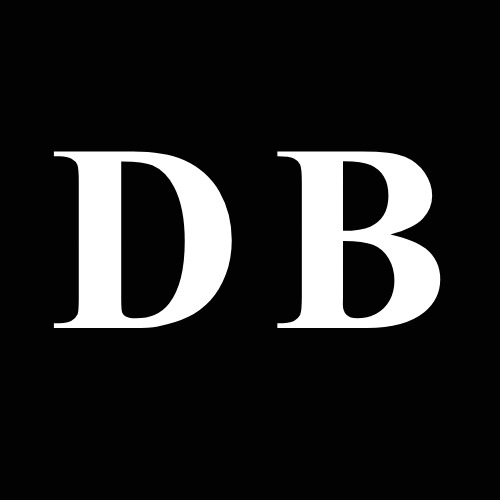

>## Professora: Franciane Rodrigues

## Equipe:
### 1.   Ana Carolina
### 2.   Carina Mayara
### 3.   David Ben
### 4.   Giovanna Shiguemori
### 5.   Marcos Neves
### 6.   Rafael Souza

---
---


**1. DESCRIÇÃO GERAL DO PROJETO**

Todas as equipes deverão entregar as mesmas especificações, de acordo com o seu respectivo tema.
Vocês deverão aplicar os conceitos vistos durante o curso para tratar, organizar e modelar pelo menos 1 (dataset) escolhido por vocês seguindo o tema de sua equipe.
Obrigatoriamente Python, Pandas e/ou PySpark, Painel Interativo (Looker/PowerBI), 2 ferramentas de Cloud
Desejável: Langchain, OKR, Geopandas, Plotly.

**2. APRESENTAÇÃO**

A apresentação do trabalho se dará da seguinte maneira: Cada grupo deverá ser totalmente responsável pela forma pela qual vai interpretar o dataset, apresentando suposições e conclusões dos dados. Todas essas situações devem ser explicadas. Deverá iniciar pela apresentação do dataset, informando de qual local foi obtido o dataset e quais as principais informações sobre o mesmo.
Deverá apresentar as funções e ferramentas utilizadas no código.
Explicar o porquê do dataset escolhido.
Todos os componentes (integrantes) deverão se apresentar.
Deverá ser usado termos técnicos, evitando o uso de gírias ou expressões coloquiais e/ou culturais.
Cada grupo terá até 60 minutos para se apresentar.
A ordem da apresentação será comunicada próximo à data de apresentação.

**3. PRINCIPAIS HABILIDADES A SEREM AVALIADAS**

Oralidade e comunicação em público.
Storytelling na apresentação dos dados: a apresentação dos dados pode ser feita de forma mais eficaz e envolvente através da técnica de storytelling. Ao contar uma história, os dados são apresentados de maneira mais clara e compreensível, e a audiência é mais facilmente motivada e engajada.
Principais métricas e KPI’s observadas: definição completa de quais métricas e/ou KPI’s serão aplicadas ao projeto, suas razões e definições estratégicas.
Estabeleça algumas sugestões de ações: construa algumas sugestões de ações frente às informações coletadas no projeto. Ações destinadas a campanhas, objetivos e segmentações, por exemplo.
Capacidade de argumentação
Habilidade de codificação em Python e utilização de suas bibliotecas
Habilidade de interpretação e análise de dados.
Capacidade de implementação de códigos utilizando a biblioteca Pandas.
Capacidade de implementação de consultas utilizando a linguagem SQL.
Capacidade analítica e interpretativa.
Capacidade de organização e grupo.

## **Conjunto de dados**
[Online Sales Dataset - Popular Marketplace Data](https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data)

## **Dicionário de Dados**

Colunas:

Order ID: Identificador único para cada venda realizada.

Date: Data das transações de vendas.

Category: Categoria ampla do produto vendido (por exemplo, Eletrônicos, Casa
Eletrodomésticos, Roupas, Livros, Produtos de Beleza, Esportes).

Product Name: Nome ou modelo específico do produto vendido.

Quantity: Quantidade de unidades do produto vendidas na transação.

Unit Price: Preço de uma unidade do produto.

Total Price: Receita total gerada pela transação de venda (Quantidade * Preço Unitário).

Region: Região geográfica onde ocorreu a transação (por exemplo, América do Norte, Europa, Ásia).

Payment Method: Método utilizado para pagamento (por exemplo, cartão de crédito, PayPal, cartão de débito).

# **Abertura e Extração de Dados**

In [1]:
# Importando a biblioteca do Google Drive e montando o Drive para acesso.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Instalação de bibliotecas necessárias.
!pip install gcsfs
!pip install pymongo
!pip install pandera
!python -m pip install "pymongo[srv]"

In [3]:
# Ignorar avisos.
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importação de bibliotecas
import os
import pymongo
import numpy as np
import pandas as pd
import pandera as pa
from pymongo.server_api import ServerApi
from google.cloud import storage
from google.colab import auth
from google.auth import default
import gspread

In [5]:
# Autorizando o acesso ao Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [6]:
# Utilizando a chave de acesso ao bucket para a autenticação.
serviceAccount = '/content/drive/MyDrive/chaves/Projeto Final/projeto-final-424922-be8f8f52898d.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [7]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket_name = 'projeto-final-424922'
file_name = 'Bruto/Online Sales Data.csv'
path = 'gs://projetofinalmelhores/Bruto/Online Sales Data.csv'

In [8]:
df = pd.read_csv(path)

In [9]:
# Configurando o Pandas.
pd.set_option(
    'display.max_columns', 100
)

# **Transformação**

**Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:**

*  Escolher as possíveis colunas importantes para a análise;
*  Verificar se há colunas iguais;
*  Verificação e tratamento de valores (ou observações) únicos;
*  Verificação e tratamento de duplicadas
*  Verificação e tratamento de inconsistência
*  Verificação e tratamento de valores nulos
*  Tradução/Renomeação
*  Transformação de tipos adequados dos dados
*  Garantia de qualidade e integridade dos dados.

In [10]:
# Exibindo a tabela original com apenas 1 exemplo para checagem.
df.head(1)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card


In [11]:
# Renomeando as colunas (traduzindo para o Português).
df.rename(columns=
            {
                'Transaction ID': 'id_transacao',
                'Date': 'data',
                'Product Category': 'categoria_produto',
                'Product Name': 'nome_produto',
                'Units Sold': 'unidade_venda',
                'Unit Price': 'preco_unidade',
                'Total Revenue': 'total_vendas',
                'Region': 'regiao',
                'Payment Method': 'metodo_pagamento'
            }, inplace = True
        )

In [12]:
# Exibindo a tradução das colunas.
df.head(1)

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card


In [13]:
# Checando os valores únicos da coluna "categoria_produto".
df.categoria_produto.unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [14]:
# Renomeando a coluna "categoria_produto" (traduzindo para o Português).
df['categoria_produto'] = df['categoria_produto'].replace\
(
    {
        'Electronics': 'eletronicos',
        'Home Appliances': 'eletrodomesticos',
        'Clothing': 'roupas',
        'Books': 'livros',
        'Beauty Products': 'produtos de beleza',
        'Sports': 'esportes'
    }
)

In [15]:
# Checando os valores já alterados.
df.categoria_produto.unique()

array(['eletronicos', 'eletrodomesticos', 'roupas', 'livros',
       'produtos de beleza', 'esportes'], dtype=object)

In [16]:
# Checandos valores únicos da coluna "nome_produto".
df.nome_produto.unique()

array(['iPhone 14 Pro', 'Dyson V11 Vacuum', "Levi's 501 Jeans",
       'The Da Vinci Code', 'Neutrogena Skincare Set',
       'Wilson Evolution Basketball', 'MacBook Pro 16-inch',
       'Blueair Classic 480i', 'Nike Air Force 1',
       'Dune by Frank Herbert', 'Chanel No. 5 Perfume',
       'Babolat Pure Drive Tennis Racket', 'Samsung Galaxy Tab S8',
       'Keurig K-Elite Coffee Maker', 'North Face Down Jacket',
       'Salt, Fat, Acid, Heat by Samin Nosrat',
       'Dyson Supersonic Hair Dryer', 'Manduka PRO Yoga Mat',
       'Garmin Forerunner 945', 'Ninja Professional Blender',
       'Zara Summer Dress', 'Gone Girl by Gillian Flynn',
       'Olay Regenerist Face Cream', 'Adidas FIFA World Cup Football',
       'Bose QuietComfort 35 Headphones', 'Panasonic NN-SN966S Microwave',
       'Adidas Ultraboost Shoes', 'Pride and Prejudice by Jane Austen',
       'MAC Ruby Woo Lipstick', 'Nike Air Zoom Pegasus 37',
       'Sony WH-1000XM4 Headphones', 'Instant Pot Duo',
       'Under Arm

In [17]:
# Renomeando a coluna "nome_produto" (traduzindo para o Português).
df['nome_produto'] = df['nome_produto'].replace({
    "iPhone 14 Pro": "iPhone 14 Pro",
    "Dyson V11 Vacuum": "Aspirador de Pó Dyson V11",
    "Levi's 501 Jeans": "Jeans Levi's 501",
    "The Da Vinci Code": "O Código Da Vinci",
    "Neutrogena Skincare Set": "Kit de Cuidados para a Pele Neutrogena",
    "Wilson Evolution Basketball": "Bola de Basquete Wilson Evolution",
    "MacBook Pro 16-inch": "MacBook Pro 16 polegadas",
    "Blueair Classic 480i": "Purificador de Ar Blueair Classic 480i",
    "Nike Air Force 1": "Tênis Nike Air Force 1",
    "Dune by Frank Herbert": "Duna de Frank Herbert",
    "Chanel No. 5 Perfume": "Perfume Chanel No. 5",
    "Babolat Pure Drive Tennis Racket": "Raquete de Tênis Babolat Pure Drive",
    "Samsung Galaxy Tab S8": "Samsung Galaxy Tab S8",
    "Keurig K-Elite Coffee Maker": "Cafeteira Keurig K-Elite",
    "North Face Down Jacket": "Jaqueta North Face Down",
    "Salt, Fat, Acid, Heat by Samin Nosrat": "Sal, Gordura, Acidez, Calor de Samin Nosrat",
    "Dyson Supersonic Hair Dryer": "Secador de Cabelo Dyson Supersonic",
    "Manduka PRO Yoga Mat": "Tapete de Yoga Manduka PRO",
    "Garmin Forerunner 945": "Garmin Forerunner 945",
    "Ninja Professional Blender": "Liquidificador Profissional Ninja",
    "Zara Summer Dress": "Vestido de verão Zara",
    "Gone Girl by Gillian Flynn": "Garota Desaparecida de Gillian Flynn",
    "Olay Regenerist Face Cream": "Creme Facial Olay Regenerist",
    "Adidas FIFA World Cup Football": "Bola de Futebol Adidas Copa do Mundo FIFA",
    "Bose QuietComfort 35 Headphones": "Headphone Bose QuietComfort 35",
    "Panasonic NN-SN966S Microwave": "Microondas Panasonic NN-SN966S",
    "Adidas Ultraboost Shoes": "Tênis Adidas Ultraboost",
    "Pride and Prejudice by Jane Austen": "Orgulho e Preconceito de Jane Austen",
    "MAC Ruby Woo Lipstick": "Batom MAC Ruby Woo",
    "Nike Air Zoom Pegasus 37": "Tênis Nike Air Zoom Pegasus 37",
    "Sony WH-1000XM4 Headphones": "Headphone Sony WH-1000XM4",
    "Instant Pot Duo": "Instant Pot Duo",
    "Under Armour HeatGear T-Shirt": "Camiseta Under Armour HeatGear",
    "1984 by George Orwell": "1984 de George Orwell",
    "L'Oreal Revitalift Serum": "Sérum L'Oreal Revitalift",
    "Peloton Bike": "Bicicleta Peloton",
    "Apple Watch Series 8": "Apple Watch Series 8",
    "Roomba i7+": "Aspirador de Pó Robô Roomba i7+",
    "Columbia Fleece Jacket": "Jaqueta Columbia Fleece",
    "Harry Potter and the Sorcerer's Stone": "Harry Potter e a Pedra Filosofal",
    "Estee Lauder Advanced Night Repair": "Estee Lauder Advanced Night Repair",
    "Fitbit Charge 5": "Fitbit Charge 5",
    "GoPro HERO10 Black": "GoPro HERO10 Black",
    "Nespresso VertuoPlus": "Nespresso VertuoPlus",
    "Patagonia Better Sweater": "Patagonia Better Sweater",
    "Becoming by Michelle Obama": "Becoming - Minha História de Michelle Obama",
    "Clinique Moisture Surge": "Clinique Moisture Surge",
    "Yeti Rambler Tumbler": "Copo Térmico Yeti Rambler",
    "Kindle Paperwhite": "Kindle Paperwhite",
    "Breville Smart Oven": "Forno Inteligente Breville",
    "Ray-Ban Aviator Sunglasses": "Óculos de Sol Ray-Ban Aviador",
    "The Silent Patient by Alex Michaelides": "A Paciente Silenciosa por Alex Michaelides",
    "Shiseido Ultimate Sun Protector": " Protetor Solar Shiseido",
    "Titleist Pro V1 Golf Balls": " Bolas de Golfe Titleist Pro V1",
    "Anker PowerCore Portable Charger": " Carregador Portátil Anker PowerCore",
    "KitchenAid Artisan Stand Mixer": " Batedeira KitchenAid Artisan",
    "Calvin Klein Boxer Briefs": " cuecas boxer Calvin Klein",
    "Educated by Tara Westover": " Educated por Tara Westover",
    "Anastasia Beverly Hills Brow Wiz": " Anastasia Beverly Hills Brow Wiz",
    "Hyperice Hypervolt Massager": " Massageador Hyperice Hypervolt",
    "Nintendo Switch": " Nintendo Switch",
    "Philips Airfryer XXL": " Fritadeira Philips Airfryer XXL",
    "Hanes ComfortSoft T-Shirt": " Camiseta Hanes ComfortSoft",
    "Where the Crawdads Sing by Delia Owens": " Onde Cantaram os Crawdads por Delia Owens",
    "Lancome La Vie Est Belle": " Lancome La Vie Est Belle",
    "Garmin Edge 530": " Garmin Edge 530",
    "Samsung QLED 4K TV": " TV Samsung QLED 4K",
    "Eufy RoboVac 11S": " Aspirador de Pó Robô Eufy RoboVac 11S",
    "Puma Suede Classic Sneakers": " Tênis Puma Suede Classic",
    "The Great Gatsby by F. Scott Fitzgerald": " O Grande Gatsby por F. Scott Fitzgerald",
    "Drunk Elephant C-Firma Day Serum": " Drunk Elephant C-Firma Day Serum",
    "Nike Metcon 6": " Nike Metcon 6",
    "HP Spectre x360 Laptop": " Laptop HP Spectre x360",
    "De'Longhi Magnifica Espresso Machine": "Máquina de Café Expresso De'Longhi Magnifica",
    "Tommy Hilfiger Polo Shirt": " Camisa polo Tommy Hilfiger",
    "To Kill a Mockingbird by Harper Lee": " O Mata-सेवाला (Matar a um Mockingbird) por Harper Lee",
    "Glossier Boy Brow": " Glossier Boy Brow",
    "Rogue Fitness Kettlebell": " kettlebell Rogue Fitness",
    "Apple AirPods Pro": " Apple AirPods Pro",
    "Dyson Pure Cool Link": " Purificador de Ar Dyson Pure Cool Link",
    "Levi's Trucker Jacket": " Jaqueta Levi's Trucker",
    "The Hobbit by J.R.R. Tolkien": " O Hobbit por J.R.R. Tolkien",
    "Charlotte Tilbury Magic Cream": " Charlotte Tilbury Magic Cream",
    "Spalding NBA Street Basketball": " Bola de Basquete Spalding NBA Street",
    "Ring Video Doorbell": " Campainha com Vídeo Ring",
    "LG OLED TV": " TV LG OLED",
    "Uniqlo Ultra Light Down Jacket": " Jaqueta Uniqlo Ultra Light Down",
    "The Catcher in the Rye by J.D. Salinger": " O Apanhador no Campo de Centeio por J.D. Salinger",
    "Sunday Riley Good Genes": " Sunday Riley Good Genes",
    "On Running Cloud Shoes": " Tênis On Running Cloud",
    "Logitech MX Master 3 Mouse": " Mouse Logitech MX Master 3",
    "Instant Pot Duo Crisp": " Panela Elétrica Instant Pot Duo Crisp",
    "Adidas Originals Superstar Sneakers": " Tênis Adidas Originals Superstar",
    "The Alchemist by Paulo Coelho": " O Alquimista por Paulo Coelho",
    "Tatcha The Water Cream": " Tatcha The Water Cream",
    "Garmin Fenix 6X Pro": " Garmin Fenix 6X Pro",
    "Bose SoundLink Revolve+ Speaker": " Caixa de Som Bose SoundLink Revolve+",
    "Vitamix Explorian Blender": " Liquidificador Vitamix Explorian",
    "Gap Essential Crewneck T-Shirt": " Camiseta Gap Essential Crewneck",
    "The Power of Now by Eckhart Tolle": " O Poder do Agora por Eckhart Tolle",
    "Kiehl's Midnight Recovery Concentrate": " Kiehl's Midnight Recovery Concentrate",
    "Under Armour HOVR Sonic 4 Shoes": " Tênis Under Armour HOVR Sonic 4",
    "Canon EOS R5 Camera": " Câmera Canon EOS R5",
    "Shark IQ Robot Vacuum": "Aspirador Robô Shark IQ",
    "H&M Slim Fit Jeans": "Jeans Slim Fit H&M",
    "The Girl on the Train by Paula Hawkins": "A Garota no Trem por Paula Hawkins",
    "The Ordinary Niacinamide Serum": "The Ordinary Sérum de Niacinamida",
    "Bowflex SelectTech 552 Dumbbells": "Halteres Bowflex SelectTech 552",
    "Google Nest Hub Max": "Google Nest Hub Max",
    "Cuisinart Griddler Deluxe": "Cuisinart Griddler Deluxe",
    "Old Navy Relaxed-Fit T-Shirt": "Camiseta Relaxed-Fit Old Navy",
    "Sapiens: A Brief History of Humankind by Yuval Noah Harari": "Sapiens: Uma Breve História da Humanidade por Yuval Noah Harari",
    "Biore UV Aqua Rich Watery Essence Sunscreen": "Biore UV Aqua Rich Watery Essence protetor solar",
    "Fitbit Versa 3": "Fitbit Versa 3",
    "Amazon Echo Show 10": "Amazon Echo Show 10",
    "Breville Smart Grill": "Breville Smart Grill",
    "Gap High Rise Skinny Jeans": "Gap Jeans Skinny Cintura Alta",
    "Atomic Habits by James Clear": "Hábitos Atômicos por James Clear",
    "CeraVe Hydrating Facial Cleanser": "CeraVe Limpeza Facial Hidratante",
    "YETI Hopper Flip Portable Cooler": "YETI Hopper Flip Cooler Portátil",
    "Apple iPad Air": "Apple iPad Air",
    "Hamilton Beach FlexBrew Coffee Maker": "Cafeteira Hamilton Beach FlexBrew",
    "Forever 21 Graphic Tee": "Forever 21 Camiseta Estampada",
    "The Subtle Art of Not Giving a F*ck by Mark Manson": "A Sutil Arte de Ligar o F*da-se - Mark Manson",
    "NARS Radiant Creamy Concealer": "NARS Radiant Creamy Corretivo",
    "Yeti Roadie 24 Cooler": "Yeti Roadie 24 Cooler",
    "Sony PlayStation 5": "Sony PlayStation 5",
    "Lululemon Align Leggings": "Lululemon Align Leggings",
    "The Four Agreements by Don Miguel Ruiz": "Os Quatro Agreements por Don Miguel Ruiz",
    "Fenty Beauty Killawatt Highlighter": "Fenty Beauty Killawatt Iluminador",
    "Hydro Flask Wide Mouth Water Bottle": "Hydro Flask Garrafa Térmica Boca Larga",
    "Microsoft Surface Laptop 4": "Microsoft Surface Laptop 4",
    "Keurig K-Mini Coffee Maker": "Cafeteira Keurig K-Mini",
    "Gap Crewneck Sweatshirt": "Gap Moletom Crewneck",
    "Think and Grow Rich by Napoleon Hill": "Pense e Enriqueça por Napoleon Hill",
    "The Ordinary Hyaluronic Acid Serum": "The Ordinary Sérum de Ácido Hialurônico",
    "Fitbit Inspire 2": "Fitbit Inspire 2",
    "Samsung Odyssey G9 Gaming Monitor": "Samsung Odyssey G9 Monitor Gamer",
    "Instant Pot Ultra": "Instant Pot Ultra",
    "Adidas Essential Track Pants": "Calça Adidas Essential Track",
    "The Power of Habit by Charles Duhigg": "O Poder do Hábito por Charles Duhigg",
    "Clinique Dramatically Different Moisturizing Lotion": "Clinique Loção Hidratante Dramatically Different",
    "YETI Tundra 45 Cooler": "YETI Tundra 45 Cooler",
    "Apple AirPods Max": "Apple AirPods Max",
    "Cuisinart Coffee Center": "Cuisinart Coffee Center",
    "Levi's Sherpa Trucker Jacket": "Jaqueta Levi's Sherpa Trucker",
    "The Outsiders by S.E. Hinton": " Os Estranhos de S.E. Hinton",
    "Laneige Water Sleeping Mask": "Máscara de dormir com água Laneige",
    "Bose SoundSport Wireless Earbuds": "Fones de Ouvido Sem Fio Bose SoundSport",
    "Ninja Foodi Pressure Cooker": "Panela de Pressão Ninja Foodi",
    "Nike Sportswear Club Fleece Hoodie": "Moletom de Fleece Nike Sportswear Club",
    "The Night Circus by Erin Morgenstern": "O Circo da Noite por Erin Morgenstern",
    "GlamGlow Supermud Clearing Treatment": "Tratamento de Limpeza GlamGlow Supermud",
    "Garmin Forerunner 245": "Garmin Forerunner 245",
    "Google Pixel 6 Pro": "Google Pixel 6 Pro",
    "Breville Nespresso Creatista Plus": "Breville Nespresso Creatista Plus",
    "Under Armour Tech 2.0 T-Shirt": "Camiseta Under Armour Tech 2.0",
    "The Art of War by Sun Tzu": "A Arte da Guerra por Sun Tzu",
    "Youth to the People Superfood Antioxidant Cleanser": "Limpador Antioxidante Superfood da Youth to the People",
    "TriggerPoint GRID Foam Roller": "Rolo de Espuma TriggerPoint GRID",
    "Apple MacBook Air": "Apple MacBook Air",
    "Cuisinart Custom 14-Cup Food Processor": "Processador de Alimentos Cuisinart Custom 14-Cup",
    "Adidas 3-Stripes Shorts": "Shorts Adidas 3-Stripes",
    "The Hunger Games by Suzanne Collins": "Jogos Vorazes por Suzanne Collins",
    "Neutrogena Hydro Boost Water Gel": "Gel de Água Neutrogena Hydro Boost",
    "Yeti Rambler Bottle": "Garrafa Yeti Rambler",
    "Samsung Odyssey G7 Gaming Monitor": "Monitor de Jogos Samsung Odyssey G7",
    "Instant Pot Duo Evo Plus": "Panela Instantânea Duo Evo Plus",
    "Nike Tempo Running Shorts": "Shorts de Corrida Nike Tempo",
    "The Girl with the Dragon Tattoo by Stieg Larsson": "Os Homens que Não Amavam as Mulheres por Stieg Larsson",
    "Paula's Choice Skin Perfecting 2% BHA Liquid Exfoliant": "Esfoliante Líquido 2% BHA da Paula\"s Choice",
    "Bowflex SelectTech 1090 Adjustable Dumbbells": "Halteres Ajustáveis Bowflex SelectTech 1090",
    "Amazon Fire TV Stick 4K": "Amazon Fire TV Stick 4K",
    "Crock-Pot 6-Quart Slow Cooker": "Panela de Cozimento Lento Crock-Pot 6-Quart",
    "Uniqlo Airism Mesh Boxer Briefs": "Cueca Boxer Mesh Uniqlo Airism",
    "The Sun Also Rises by Ernest Hemingway": "O Sol Também se Levanta por Ernest Hemingway",
    "First Aid Beauty Ultra Repair Cream": "Creme de Reparo Ultra First Aid Beauty",
    "Oakley Holbrook Sunglasses": "Óculos de Sol Oakley Holbrook",
    "Google Pixelbook Go": "Google Pixelbook Go",
    "Dyson V8 Absolute": "Dyson V8 Absolute",
    "Levi's 511 Slim Fit Jeans": "Jeans Levi\"s 511 Slim Fit",
    "The Martian by Andy Weir": "Perdido em Marte por Andy Weir",
    "La Mer CrÃ¨me de la Mer Moisturizer": "Hidratante La Mer Crème de la Mer",
    "Polar Vantage V2": "Polar Vantage V2",
    "Sonos Beam Soundbar": "Soundbar Sonos Beam",
    "Anova Precision Cooker": "Circulador de Imersão Anova Precision",
    "Nike Dri-FIT Training Shorts": "Shorts de Treinamento Nike Dri-FIT",
    "Glossier Cloud Paint": "Blush Líquido Glossier Cloud Paint",
    "TRX All-in-One Suspension Training System": "Sistema de Treinamento Suspenso TRX All-in-One",
    "Logitech G Pro X Wireless Gaming Headset": "Headset de Jogos Sem Fio Logitech G Pro X",
    "Breville Smart Coffee Grinder Pro": "Moedor de Café Breville Smart Pro",
    "Adidas Ultraboost Running Shoes": "Tênis de Corrida Adidas Ultraboost",
    "The Road by Cormac McCarthy": "A Estrada por Cormac McCarthy",
    "Tom Ford Black Orchid Perfume": "Perfume Tom Ford Black Orchid",
    "GoPro HERO9 Black": "GoPro HERO9 Black",
    "Apple TV 4K": "Apple TV 4K",
    "Instant Pot Duo Nova": "Panela Instantânea Duo Nova",
    "Gap 1969 Original Fit Jeans": "Jeans Gap 1969 Original Fit",
    "The Goldfinch by Donna Tartt": "O Pintassilgo por Donna Tartt",
    "Dr. Jart+ Cicapair Tiger Grass Color Correcting Treatment": "Tratamento Corretor de Cor Dr. Jart+ Cicapair Tiger Grass",
    "Yeti Tundra Haul Portable Wheeled Cooler": "Cooler Portátil com Rodas Yeti Tundra Haul",
    "Samsung Galaxy Watch 4": "Samsung Galaxy Watch 4",
    "KitchenAid Stand Mixer": "Batedeira KitchenAid",
    "Lululemon Wunder Under High-Rise Leggings": "Leggings Lululemon Wunder Under High-Rise",
    "The Great Alone by Kristin Hannah": "O Caminho para Casa por Kristin Hannah",
    "Caudalie Vinoperfect Radiance Serum": "Sérum Radiance Caudalie Vinoperfect",
    "Bose SoundLink Color Bluetooth Speaker II": "Caixa de Som Bluetooth Bose SoundLink Color II",
    "Canon EOS Rebel T7i DSLR Camera": "Câmera DSLR Canon EOS Rebel T7i",
    "Uniqlo Airism Seamless Boxer Briefs": "Cueca Boxer Sem Costura Uniqlo Airism",
    "L'Occitane Shea Butter Hand Cream": "Creme para as Mãos Manteiga de Karité L\"Occitane",
    "YETI Tundra 65 Cooler": "Cooler YETI Tundra 65",
    "Apple MacBook Pro 16-inch": "Apple MacBook Pro 16 polegadas",
    "iRobot Braava Jet M6": "iRobot Braava Jet M6",
    "Champion Reverse Weave Hoodie": "Moletom Champion Reverse Weave",
    "The Nightingale by Kristin Hannah": "O Rouxinol por Kristin Hannah",
    "Tarte Shape Tape Concealer": "Corretivo Tarte Shape Tape",
    "Amazon Echo Dot (4th Gen)": "Amazon Echo Dot (4ª Geração)",
    "Philips Sonicare DiamondClean Toothbrush": "Escova de Dentes Philips Sonicare DiamondClean",
    "Old Navy Mid-Rise Rockstar Super Skinny Jeans": "Jeans Skinny Old Navy Mid-Rise Rockstar",
    "The Ordinary Caffeine Solution 5% + EGCG": "Solução de Cafeína 5% + EGCG da The Ordinary",
    "Fitbit Luxe": "Fitbit Luxe",
    "Google Nest Wifi Router": "Roteador Google Nest Wifi",
    "Anova Precision Oven": "Forno de Precisão Anova",
    "Adidas Originals Trefoil Hoodie": "Moletom Adidas Originals Trefoil",
    "Fresh Sugar Lip Treatment": "Tratamento Labial Fresh Sugar",
    "Hydro Flask Standard Mouth Water Bottle": "Garrafa de Água Hydro Flask Standard Mouth",
    "Bose QuietComfort 35 II Wireless Headphones": "Fones de Ouvido Sem Fio Bose QuietComfort 35 II",
    "Nespresso Vertuo Next Coffee and Espresso Maker": "Máquina de Café e Espresso Nespresso Vertuo Next",
    "Nike Air Force 1 Sneakers": "Tênis Nike Air Force 1",
    "The Handmaid's Tale by Margaret Atwood": "O Conto da Aia por Margaret Atwood",
    "Sunday Riley Luna Sleeping Night Oil": "Óleo Noturno Sunday Riley Luna Sleeping",
    "Yeti Rambler 20 oz Tumbler": "Copo Yeti Rambler 20 oz"
    }
)

In [18]:
# Checando as alterações feitas na coluna "nome_produto".
df.head(5)

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,eletronicos,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,eletrodomesticos,Aspirador de Pó Dyson V11,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,roupas,Jeans Levi's 501,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,livros,O Código Da Vinci,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,produtos de beleza,Kit de Cuidados para a Pele Neutrogena,1,89.99,89.99,Europe,PayPal


In [19]:
# Checando novamente através dos valores únicos.
df.nome_produto.unique()

array(['iPhone 14 Pro', 'Aspirador de Pó Dyson V11', "Jeans Levi's 501",
       'O Código Da Vinci', 'Kit de Cuidados para a Pele Neutrogena',
       'Bola de Basquete Wilson Evolution', 'MacBook Pro 16 polegadas',
       'Purificador de Ar Blueair Classic 480i', 'Tênis Nike Air Force 1',
       'Duna de Frank Herbert', 'Perfume Chanel No. 5',
       'Raquete de Tênis Babolat Pure Drive', 'Samsung Galaxy Tab S8',
       'Cafeteira Keurig K-Elite', 'Jaqueta North Face Down',
       'Sal, Gordura, Acidez, Calor de Samin Nosrat',
       'Secador de Cabelo Dyson Supersonic', 'Tapete de Yoga Manduka PRO',
       'Garmin Forerunner 945', 'Liquidificador Profissional Ninja',
       'Vestido de verão Zara', 'Garota Desaparecida de Gillian Flynn',
       'Creme Facial Olay Regenerist',
       'Bola de Futebol Adidas Copa do Mundo FIFA',
       'Headphone Bose QuietComfort 35', 'Microondas Panasonic NN-SN966S',
       'Tênis Adidas Ultraboost', 'Orgulho e Preconceito de Jane Austen',
       'Bat

In [20]:
# Renomeando a coluna "regiao" (traduzindo para o Português).
df.regiao.replace\
(
    {
        "Europe": "Europa",
        "North America": "América do Norte"
    },
    inplace = True
)


In [21]:
# Checando a alteração da coluna "regiao".
df.head(5)

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,eletronicos,iPhone 14 Pro,2,999.99,1999.98,América do Norte,Credit Card
1,10002,2024-01-02,eletrodomesticos,Aspirador de Pó Dyson V11,1,499.99,499.99,Europa,PayPal
2,10003,2024-01-03,roupas,Jeans Levi's 501,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,livros,O Código Da Vinci,4,15.99,63.96,América do Norte,Credit Card
4,10005,2024-01-05,produtos de beleza,Kit de Cuidados para a Pele Neutrogena,1,89.99,89.99,Europa,PayPal


In [22]:
# Checando valores únicos da coluna "metodo_pagamento".
df.metodo_pagamento.unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

In [23]:
# Criar uma nova coluna com os valores traduzidos
df['metodo_pagamento_traduzido'] = df['metodo_pagamento'].replace(
{
    "Credit Card": "Cartão de Crédito",
    "Debit Card": "Cartão de Débito"
})

# Descartar a coluna original
df.drop(columns=['metodo_pagamento'], inplace=True)

# Renomear a nova coluna para o nome antigo
df.rename(columns={'metodo_pagamento_traduzido': 'metodo_pagamento'}, inplace=True)

In [24]:
# Checando a alteração da coluna "metodo_pagamento".
df.head(5)

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,eletronicos,iPhone 14 Pro,2,999.99,1999.98,América do Norte,Cartão de Crédito
1,10002,2024-01-02,eletrodomesticos,Aspirador de Pó Dyson V11,1,499.99,499.99,Europa,PayPal
2,10003,2024-01-03,roupas,Jeans Levi's 501,3,69.99,209.97,Asia,Cartão de Débito
3,10004,2024-01-04,livros,O Código Da Vinci,4,15.99,63.96,América do Norte,Cartão de Crédito
4,10005,2024-01-05,produtos de beleza,Kit de Cuidados para a Pele Neutrogena,1,89.99,89.99,Europa,PayPal


### **Tipos de dados e checagem de valores nulos**

In [25]:
# Checando os tipos de dados.
df.dtypes

id_transacao           int64
data                  object
categoria_produto     object
nome_produto          object
unidade_venda          int64
preco_unidade        float64
total_vendas         float64
regiao                object
metodo_pagamento      object
dtype: object

In [26]:
# Checagem de valores nulos.
df.isnull().sum()

id_transacao         0
data                 0
categoria_produto    0
nome_produto         0
unidade_venda        0
preco_unidade        0
total_vendas         0
regiao               0
metodo_pagamento     0
dtype: int64

### **Alteração de tipos de dados necessários**


1.   data - de string para datetime.
2.   id_transacao - de inteiro para string.



In [27]:
# Alterando o tipo de dado da coluna "data"(string) para "data"(datetime).
df['data'] = pd.to_datetime(df['data'])

In [28]:
# Checando a alteração.
df.dtypes

id_transacao                  int64
data                 datetime64[ns]
categoria_produto            object
nome_produto                 object
unidade_venda                 int64
preco_unidade               float64
total_vendas                float64
regiao                       object
metodo_pagamento             object
dtype: object

In [29]:
# Alterando o tipo de dado da coluna "id_transacao" para o tipo string.
df['id_transacao'] = df['id_transacao'].astype(str)

In [30]:
# Checando a alteração.
df.dtypes

id_transacao                 object
data                 datetime64[ns]
categoria_produto            object
nome_produto                 object
unidade_venda                 int64
preco_unidade               float64
total_vendas                float64
regiao                       object
metodo_pagamento             object
dtype: object

In [31]:
# Gerando um backup dos dados.
df_backup = df

In [32]:
# Extração por Google Drive dos dados tratados
# df = df.to_csv('/content/drive/MyDrive/Tratado_Online Sales Data.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_transacao       240 non-null    object        
 1   data               240 non-null    datetime64[ns]
 2   categoria_produto  240 non-null    object        
 3   nome_produto       240 non-null    object        
 4   unidade_venda      240 non-null    int64         
 5   preco_unidade      240 non-null    float64       
 6   total_vendas       240 non-null    float64       
 7   regiao             240 non-null    object        
 8   metodo_pagamento   240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 17.0+ KB


In [34]:
df

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,eletronicos,iPhone 14 Pro,2,999.99,1999.98,América do Norte,Cartão de Crédito
1,10002,2024-01-02,eletrodomesticos,Aspirador de Pó Dyson V11,1,499.99,499.99,Europa,PayPal
2,10003,2024-01-03,roupas,Jeans Levi's 501,3,69.99,209.97,Asia,Cartão de Débito
3,10004,2024-01-04,livros,O Código Da Vinci,4,15.99,63.96,América do Norte,Cartão de Crédito
4,10005,2024-01-05,produtos de beleza,Kit de Cuidados para a Pele Neutrogena,1,89.99,89.99,Europa,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,eletrodomesticos,Máquina de Café e Espresso Nespresso Vertuo Next,1,159.99,159.99,Europa,PayPal
236,10237,2024-08-24,roupas,Tênis Nike Air Force 1,3,90.00,270.00,Asia,Cartão de Débito
237,10238,2024-08-25,livros,O Conto da Aia por Margaret Atwood,3,10.99,32.97,América do Norte,Cartão de Crédito
238,10239,2024-08-26,produtos de beleza,Óleo Noturno Sunday Riley Luna Sleeping,1,55.00,55.00,Europa,PayPal


### **Verificando a qualidade do conjunto e dados e fazendo a sua validação**
Utilizando o pacote pandera


In [35]:
df_gcp = df

In [36]:
# backup dos dados tratados e validados.
df_gcp = pd.read_csv(path,sep=',',encoding='ISO-8859-1')
dfback = df_gcp.copy()

In [37]:
# Verificação da qualidade do conjunto de dados
schema = pa.DataFrameSchema\
    (
        columns =
        {
            'id_transacao':pa.Column(pa.String),
            'data':pa.Column(pa.DateTime),
            'categoria_produto':pa.Column(pa.String),
            'nome_produto':pa.Column(pa.String),
            'unidade_venda':pa.Column(pa.Int),
            'preco_unidade':pa.Column(pa.Float),
            'total_vendas':pa.Column(pa.Float),
            'regiao':pa.Column(pa.String),
            'metodo_pagamento':pa.Column(pa.String)
        }
    )

In [38]:
schema.validate(df)

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,eletronicos,iPhone 14 Pro,2,999.99,1999.98,América do Norte,Cartão de Crédito
1,10002,2024-01-02,eletrodomesticos,Aspirador de Pó Dyson V11,1,499.99,499.99,Europa,PayPal
2,10003,2024-01-03,roupas,Jeans Levi's 501,3,69.99,209.97,Asia,Cartão de Débito
3,10004,2024-01-04,livros,O Código Da Vinci,4,15.99,63.96,América do Norte,Cartão de Crédito
4,10005,2024-01-05,produtos de beleza,Kit de Cuidados para a Pele Neutrogena,1,89.99,89.99,Europa,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,eletrodomesticos,Máquina de Café e Espresso Nespresso Vertuo Next,1,159.99,159.99,Europa,PayPal
236,10237,2024-08-24,roupas,Tênis Nike Air Force 1,3,90.00,270.00,Asia,Cartão de Débito
237,10238,2024-08-25,livros,O Conto da Aia por Margaret Atwood,3,10.99,32.97,América do Norte,Cartão de Crédito
238,10239,2024-08-26,produtos de beleza,Óleo Noturno Sunday Riley Luna Sleeping,1,55.00,55.00,Europa,PayPal


# **Carregamento**

In [39]:
# Checando o dataframe para o carregamento
df

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,eletronicos,iPhone 14 Pro,2,999.99,1999.98,América do Norte,Cartão de Crédito
1,10002,2024-01-02,eletrodomesticos,Aspirador de Pó Dyson V11,1,499.99,499.99,Europa,PayPal
2,10003,2024-01-03,roupas,Jeans Levi's 501,3,69.99,209.97,Asia,Cartão de Débito
3,10004,2024-01-04,livros,O Código Da Vinci,4,15.99,63.96,América do Norte,Cartão de Crédito
4,10005,2024-01-05,produtos de beleza,Kit de Cuidados para a Pele Neutrogena,1,89.99,89.99,Europa,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,eletrodomesticos,Máquina de Café e Espresso Nespresso Vertuo Next,1,159.99,159.99,Europa,PayPal
236,10237,2024-08-24,roupas,Tênis Nike Air Force 1,3,90.00,270.00,Asia,Cartão de Débito
237,10238,2024-08-25,livros,O Conto da Aia por Margaret Atwood,3,10.99,32.97,América do Norte,Cartão de Crédito
238,10239,2024-08-26,produtos de beleza,Óleo Noturno Sunday Riley Luna Sleeping,1,55.00,55.00,Europa,PayPal


In [40]:
# Carregando para o Google Sheets + instalando o pacote
!pip install gspread

In [41]:
gc.open

<bound method Client.open of <gspread.client.Client object at 0x792bd6436920>>

## **Carregando para a Cloud Storage**

In [42]:
# Carregando para a Cloud Storage (bucket)

path = 'gs://projetofinalmelhores/Tratado/Online Sales Data_Tratado.csv'
df.to_csv(path, index=False)

In [43]:
# Checando os tipos de dados enviados para a bucket.
df.dtypes

id_transacao                 object
data                 datetime64[ns]
categoria_produto            object
nome_produto                 object
unidade_venda                 int64
preco_unidade               float64
total_vendas                float64
regiao                       object
metodo_pagamento             object
dtype: object

## **Carregando para o Google Sheets**

In [44]:
# Leitura da planilha do Google Sheets para o carregamento.
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1C1b9E4scyo4csuUM_scogcU8bDBbkkOTM5vDBQFRQ3A/edit#gid=0')
worksheet = sh.get_worksheet(0)

In [45]:
# Abrindo a planilha.
planilha = gc.open('Online_Sales_Data_Tratado')

In [46]:
# Selecionando a página da planilha a ser substituída.
Online_Sales_Data_Tratado = planilha.worksheet('Página1')

In [47]:
# Anterando datetime para string para envio sem erros para o Google Sheets
df['data'] = df['data'].astype(str)

In [48]:
# Carregando os dados para o Google Sheets.
Online_Sales_Data_Tratado.update([df.columns.values.tolist()] + df.values.tolist())

{'spreadsheetId': '1C1b9E4scyo4csuUM_scogcU8bDBbkkOTM5vDBQFRQ3A',
 'updatedRange': "'Página1'!A1:I241",
 'updatedRows': 241,
 'updatedColumns': 9,
 'updatedCells': 2169}

In [49]:
# Checando os dados enviados para o Google Sheets
df

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,eletronicos,iPhone 14 Pro,2,999.99,1999.98,América do Norte,Cartão de Crédito
1,10002,2024-01-02,eletrodomesticos,Aspirador de Pó Dyson V11,1,499.99,499.99,Europa,PayPal
2,10003,2024-01-03,roupas,Jeans Levi's 501,3,69.99,209.97,Asia,Cartão de Débito
3,10004,2024-01-04,livros,O Código Da Vinci,4,15.99,63.96,América do Norte,Cartão de Crédito
4,10005,2024-01-05,produtos de beleza,Kit de Cuidados para a Pele Neutrogena,1,89.99,89.99,Europa,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,eletrodomesticos,Máquina de Café e Espresso Nespresso Vertuo Next,1,159.99,159.99,Europa,PayPal
236,10237,2024-08-24,roupas,Tênis Nike Air Force 1,3,90.00,270.00,Asia,Cartão de Débito
237,10238,2024-08-25,livros,O Conto da Aia por Margaret Atwood,3,10.99,32.97,América do Norte,Cartão de Crédito
238,10239,2024-08-26,produtos de beleza,Óleo Noturno Sunday Riley Luna Sleeping,1,55.00,55.00,Europa,PayPal


In [50]:
# Checando os tipos de dados enviados para o Google Sheets.
df.dtypes

id_transacao          object
data                  object
categoria_produto     object
nome_produto          object
unidade_venda          int64
preco_unidade        float64
total_vendas         float64
regiao                object
metodo_pagamento      object
dtype: object

In [51]:
# Alterando novamente a coluna 'data' para datetime após envio ao Google Sheets
# Esta alteração é justificada para as Análises.
df['data'] = pd.to_datetime(df['data'])

In [52]:
# Checando as alterações.
df.dtypes

id_transacao                 object
data                 datetime64[ns]
categoria_produto            object
nome_produto                 object
unidade_venda                 int64
preco_unidade               float64
total_vendas                float64
regiao                       object
metodo_pagamento             object
dtype: object

# **Analise dos Dados**

In [53]:
# Importando bibliotecas importantes para visualização de dados
import pandera as pa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
# Instalação de pacote
!pip install ydata-profiling

In [55]:
# Importação do pacote
from ydata_profiling import ProfileReport

In [56]:
# Estatistica descritiva do conjunto de dados (verificar a notação cientifica)
# numéricos
df.describe()

,data,unidade_venda,preco_unidade,total_vendas
count,240,240.000000,240.000000,240.000000
mean,2024-04-29 12:00:00,2.158333,236.395583,335.699375
min,2024-01-01 00:00:00,1.000000,6.500000,6.500000
25%,2024-02-29 18:00:00,1.000000,29.500000,62.965000
50%,2024-04-29 12:00:00,2.000000,89.990000,179.970000
75%,2024-06-28 06:00:00,3.000000,249.990000,399.225000
max,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000
std,NaN,1.322454,429.446695,485.804469


In [57]:
df

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento
0,10001,2024-01-01,eletronicos,iPhone 14 Pro,2,999.99,1999.98,América do Norte,Cartão de Crédito
1,10002,2024-01-02,eletrodomesticos,Aspirador de Pó Dyson V11,1,499.99,499.99,Europa,PayPal
2,10003,2024-01-03,roupas,Jeans Levi's 501,3,69.99,209.97,Asia,Cartão de Débito
3,10004,2024-01-04,livros,O Código Da Vinci,4,15.99,63.96,América do Norte,Cartão de Crédito
4,10005,2024-01-05,produtos de beleza,Kit de Cuidados para a Pele Neutrogena,1,89.99,89.99,Europa,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,eletrodomesticos,Máquina de Café e Espresso Nespresso Vertuo Next,1,159.99,159.99,Europa,PayPal
236,10237,2024-08-24,roupas,Tênis Nike Air Force 1,3,90.00,270.00,Asia,Cartão de Débito
237,10238,2024-08-25,livros,O Conto da Aia por Margaret Atwood,3,10.99,32.97,América do Norte,Cartão de Crédito
238,10239,2024-08-26,produtos de beleza,Óleo Noturno Sunday Riley Luna Sleeping,1,55.00,55.00,Europa,PayPal


In [58]:
df.dtypes

id_transacao                 object
data                 datetime64[ns]
categoria_produto            object
nome_produto                 object
unidade_venda                 int64
preco_unidade               float64
total_vendas                float64
regiao                       object
metodo_pagamento             object
dtype: object

In [59]:
# extrai o mês de cada data nessa coluna.
# Em seguida, atribui esses valores de meses à nova coluna "mes".
df['mes'] = df['data'].dt.month

In [60]:
# coluna "mes" adicionado ao fim dos dados, baseado nos meses da tabela "data"
df.sample(5)

,id_transacao,data,categoria_produto,nome_produto,unidade_venda,preco_unidade,total_vendas,regiao,metodo_pagamento,mes
41,10042,2024-02-11,esportes,Fitbit Charge 5,2,129.99,259.98,Asia,Cartão de Crédito,2
239,10240,2024-08-27,esportes,Copo Yeti Rambler 20 oz,2,29.99,59.98,Asia,Cartão de Crédito,8
169,10170,2024-06-18,eletrodomesticos,Panela Instantânea Duo Evo Plus,2,139.99,279.98,Europa,PayPal,6
197,10198,2024-07-16,esportes,GoPro HERO9 Black,1,449.99,449.99,Asia,Cartão de Crédito,7
130,10131,2024-05-10,produtos de beleza,Fenty Beauty Killawatt Iluminador,1,36.00,36.00,Europa,PayPal,5


In [61]:
# df.groupby('mes') --> Agrupa os dados do DataFrame pela coluna "mes".
# total_vendas.sum() -> Para cada grupo de meses, calcula a soma dos valores da coluna "total_vendas".
# reset_index() ------> Reseta o índice do DataFrame resultante, para que o índice seja sequencial novamente.

vendas_mes = df.groupby('mes')['total_vendas'].sum().reset_index()

In [62]:
# visualizar o resultado dessa variavel criada
vendas_mes

,mes,total_vendas
0,1,14548.32
1,2,10803.37
2,3,12849.24
3,4,12451.69
4,5,8455.49
5,6,7384.55
6,7,6797.08
7,8,7278.11


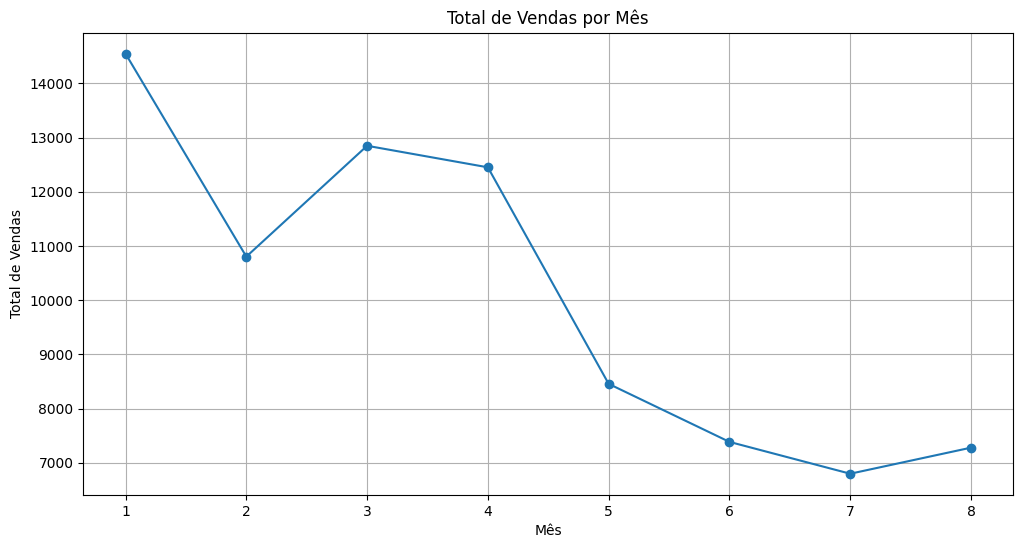

In [63]:
"""
Gráfico de linha criado no propósito de visualizar o total de vendas por mês.
"""
plt.figure(figsize=(12, 6))
plt.plot(vendas_mes['mes'], vendas_mes['total_vendas'], marker='o', linestyle='-')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

> Resultado:
**As maiores receitas foram em Janeiro, Março e Abril respectivamente.**

In [64]:
# visualizar valores únicos
df['nome_produto'].nunique()

231

In [65]:
# Organizando o dataframe para visualização utilizando a função groupby.
# Mostrando apenas 'categoria_produto', 'nome_produto' e 'unidade_venda'.
categoria_produto_venda = df.groupby\
    (['categoria_produto', 'nome_produto'])['unidade_venda'].sum().reset_index()


print(categoria_produto_venda)

    categoria_produto                            nome_produto  unidade_venda
0    eletrodomesticos   Aspirador de Pó Robô Eufy RoboVac 11S              3
1    eletrodomesticos            Batedeira KitchenAid Artisan              1
2    eletrodomesticos         Fritadeira Philips Airfryer XXL              2
3    eletrodomesticos        Liquidificador Vitamix Explorian              1
4    eletrodomesticos   Panela Elétrica Instant Pot Duo Crisp              1
..                ...                                     ...            ...
228            roupas                 Tênis Adidas Ultraboost              2
229            roupas                  Tênis Nike Air Force 1              9
230            roupas      Tênis de Corrida Adidas Ultraboost              2
231            roupas                   Vestido de verão Zara              3
232            roupas           Óculos de Sol Ray-Ban Aviador              3

[233 rows x 3 columns]


In [66]:
# Mostrando os top produtos mais vendidos por unidade.
top_produto_venda = categoria_produto_venda.loc\
    [categoria_produto_venda.groupby('categoria_produto')['unidade_venda'].idxmax()]

print(top_produto_venda)

      categoria_produto                                       nome_produto  \
0      eletrodomesticos              Aspirador de Pó Robô Eufy RoboVac 11S   
42          eletronicos                Carregador Portátil Anker PowerCore   
78             esportes               Bola de Basquete Spalding NBA Street   
120              livros   O Apanhador no Campo de Centeio por J.D. Sali...   
154  produtos de beleza                   Anastasia Beverly Hills Brow Wiz   
196              roupas                         Camiseta Hanes ComfortSoft   

     unidade_venda  
0                3  
42               4  
78               6  
120              7  
154              2  
196             10  


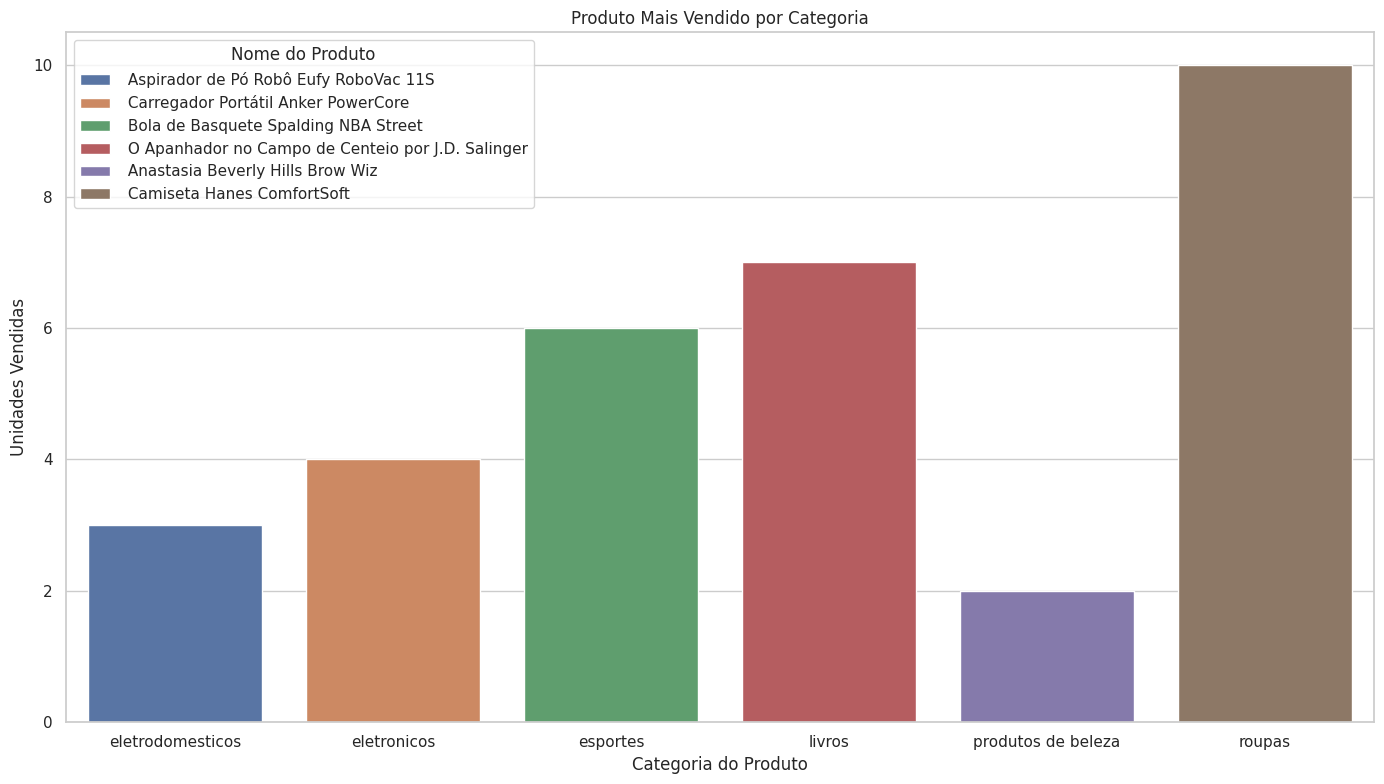

In [67]:
# Grafico de colunas para visualizar os produtos mais vendidos nas suas categorias.

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

bar_plot = sns.barplot(x='categoria_produto', y='unidade_venda', hue='nome_produto', dodge=False, data=top_produto_venda)

plt.title('Produto Mais Vendido por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=0)
plt.legend(title='Nome do Produto')
plt.tight_layout()

plt.show()

> resultado: **nota-se a camiseta Hanes 'ComfotSoft' foi a mais vendida na categoria roupas e dentre as outras categorias.**

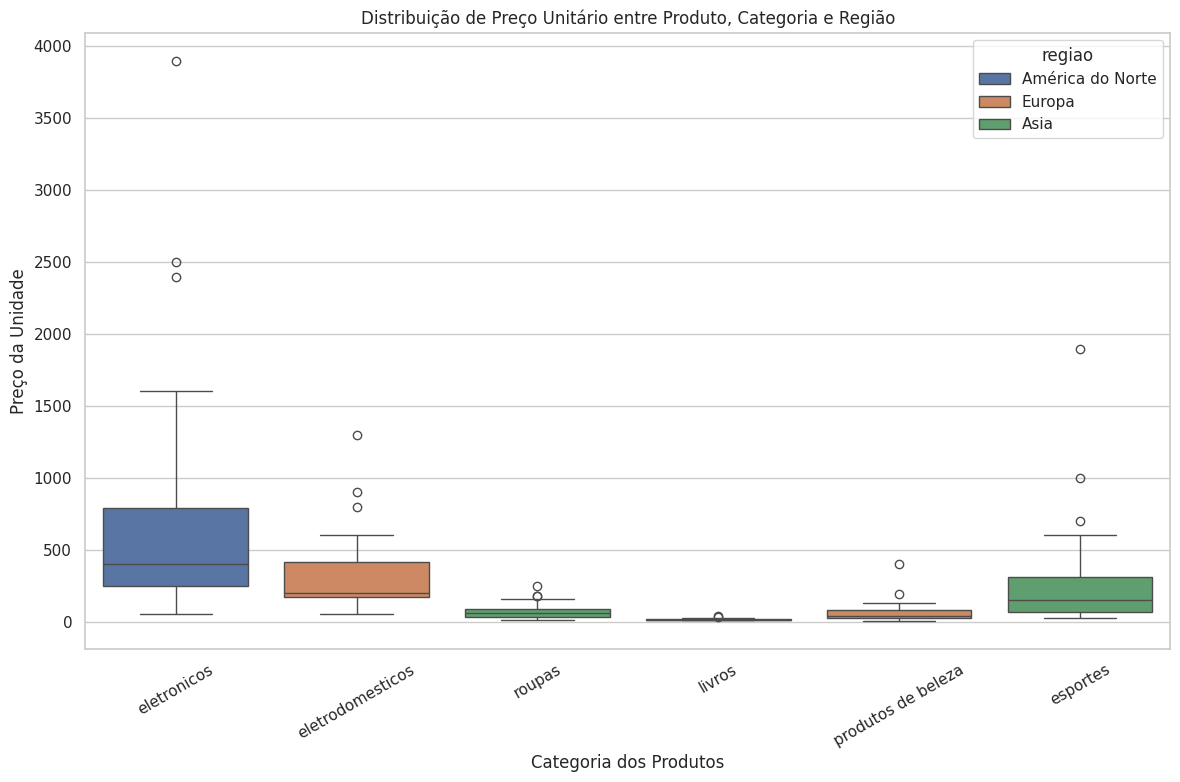

In [68]:
# Gráfico de Boxplot que mostra a distribuição dos dados em preço unitário entre produtos, categoria e região.

plt.figure(figsize=(14, 8))
sns.boxplot(x='categoria_produto', y='preco_unidade', hue='regiao', data=df)
plt.title('Distribuição de Preço Unitário entre Produto, Categoria e Região')
plt.xlabel('Categoria dos Produtos')
plt.ylabel('Preço da Unidade')
plt.xticks(rotation=30)
plt.show()

> **Eletrônicos e eletrodomésticos têm preços altos e variados que exigem gerenciamento cuidadoso de estoque, enquanto roupas, livros e produtos de beleza apresentam preços consistentes e mais baixos, ideais para estratégias promocionais padrão, com notáveis ​​valores discrepantes nas categorias de eletrônicos e esportes.**

               unidade_venda  preco_unidade  total_vendas
unidade_venda       1.000000      -0.308583     -0.171151
preco_unidade      -0.308583       1.000000      0.930350
total_vendas       -0.171151       0.930350      1.000000


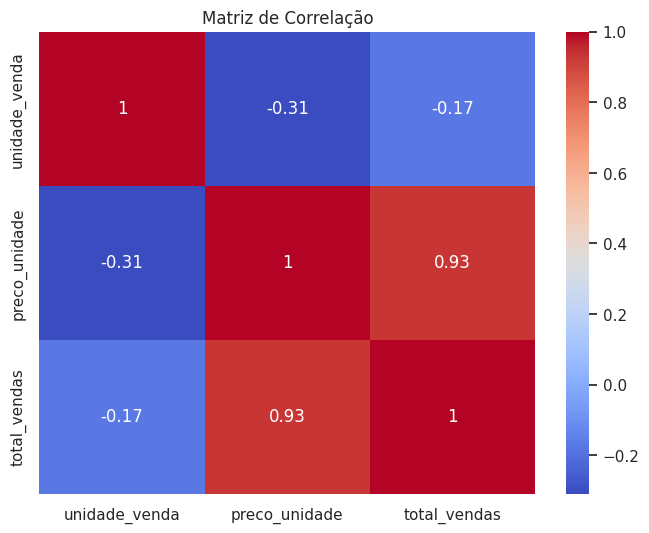

In [69]:
# Calcular as correlações
correlacao = df[['unidade_venda', 'preco_unidade', 'total_vendas']].corr()

# Display da correlação
print(correlacao)

# Visualizar a correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

> **A matriz de correlação revela que o preço unitário está fortemente correlacionado positivamente com o total de vendas (0,93), enquanto as unidades vendidas estão negativamente correlacionadas com o preço unitário (-0,31) e apresentam uma correlação negativa fraca com o total de vendas (-0,17).**

In [70]:
# Variavel que calcula a soma de duas colunas para ter um total de vendas baseado no metodo de pagamento.
metodo_pagamento = df.groupby('metodo_pagamento')['total_vendas'].sum().reset_index()

In [71]:
# visualizar a variavel criada em modo tabela
metodo_pagamento

,metodo_pagamento,total_vendas
0,Cartão de Crédito,51170.86
1,Cartão de Débito,8128.93
2,PayPal,21268.06


<Axes: xlabel='metodo_pagamento', ylabel='total_vendas'>

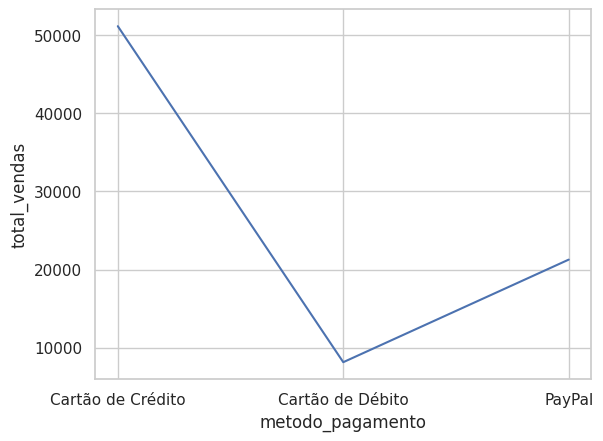

In [72]:
# baseado no último código, pegamos a variavel metodo_pagamento
# para visualizar a tabela em um gráfico de linhas.
sns.lineplot(data=metodo_pagamento, x=metodo_pagamento['metodo_pagamento'], y=metodo_pagamento['total_vendas'])

> Resultado: **A maior parte da receita se dá pelo pagamento com cartão de crédito, seguida por PayPal e Cartão de Débito.**